# DBSCAN Applied to Dissected Data, using Burst View and RF Selected Features

## Libraries and Configurations

Import configuration files

In [19]:
from configparser import ConfigParser

config = ConfigParser()
config.read("../config.ini")

['../config.ini']

Import **data libraries**

In [20]:
import pandas as pd

Import **other libraries**

In [21]:
from rich.progress import Progress
from rich import traceback

traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x77d2f6d93c90>>

Custom helper scripts

In [22]:
%cd ..
from scripts import plotHelper, encodingHelper
%cd data_exploration_cleaning

/home/bacci/COMPACT/notebooks
/home/bacci/COMPACT/notebooks/data_exploration_cleaning


## Import Data

In [23]:
burst_csv = (
    config["DEFAULT"]["interim_path"] + "dissected/selected_burst_dissected_df.csv"
)

In [24]:
burst_df = pd.read_csv(burst_csv, index_col=0)

In [25]:
burst_df

,MAC Address,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label
0,00:0f:00:6a:68:8b,2,279,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SamsungJ6_K
2,02:00:00:00:00:00,11,123,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SamsungM31_A
3,02:00:00:00:3e:b2,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4,02:00:3a:5e:a1:f4,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_B
5,02:02:70:30:b6:43,62,143,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,62,131,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
4411,fe:f9:fc:fb:83:9e,1,156,0.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone6_N
4412,fe:fc:07:34:10:69,62,132,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4413,fe:fc:aa:d1:89:d1,62,143,0.0,3.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W


## Normalize Data

Let's fill all the `NaN` with `-1`, since it is not a value that should appear

In [26]:
burst_df.fillna("-1", inplace=True)

First of all, we need to convert numeric column types from `object` to numeric, like `float64`. Basically all the columns can be converted, except from `MAC Address` and `Label`.

In [27]:
# Assuming df is your DataFrame
numeric_columns = [
    col for col in burst_df.columns if col not in ["MAC Address", "Label"]
]

# Convert selected columns to numeric type
burst_df[numeric_columns] = burst_df[numeric_columns].apply(
    pd.to_numeric, errors="coerce"
)

Now we can apply min-max normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Normalize each column using Min-Max scaling
scaler = MinMaxScaler()
burst_df[numeric_columns] = scaler.fit_transform(burst_df[numeric_columns])

Let's check how the data is looking

In [30]:
burst_df

,MAC Address,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label
0,00:0f:00:6a:68:8b,0.032258,1.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SamsungJ6_K
2,02:00:00:00:00:00,0.177419,0.287671,0.0,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SamsungM31_A
3,02:00:00:00:3e:b2,1.000000,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4,02:00:3a:5e:a1:f4,1.000000,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_B
5,02:02:70:30:b6:43,1.000000,0.378995,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,1.000000,0.324201,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W
4411,fe:f9:fc:fb:83:9e,0.016129,0.438356,0.0,0.0,0.714286,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone6_N
4412,fe:fc:07:34:10:69,1.000000,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C
4413,fe:fc:aa:d1:89:d1,1.000000,0.378995,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W


## DBSCAN Clustering

For simplicity we are using the parameters obtained in previous works, through hyper-parameter tuning

In [31]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [32]:
burst_df.fillna("-1", inplace=True)

/tmp/ipykernel_31396/1153771547.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  burst_df.fillna("-1", inplace=True)


Using DBSCAN algorithm to perform clustering

In [33]:
clusterer = DBSCAN(eps=0.05, min_samples=6).fit(
    burst_df.drop(columns=["MAC Address", "Label"])
)

In [34]:
burst_df["Cluster"] = clusterer.labels_

In [35]:
burst_df

,MAC Address,Vendor Specific Tags,Length,DSSS_CCK,SM_Power_Save,Min_MPDCU_Start_Spacing,RX_Highest_Supported_Data_Rate,Extended_Channel_Switching,WNM_Sleep_Mode,DMS,Interworking,QoS_Map,WNM_Notification,Operating_Mode_Notification,Label,Cluster
0,00:0f:00:6a:68:8b,0.032258,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SamsungJ6_K,-1
2,02:00:00:00:00:00,0.177419,0.287671,0.0,1.0,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,SamsungM31_A,0
3,02:00:00:00:3e:b2,1.0,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C,1
4,02:00:3a:5e:a1:f4,1.0,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_B,1
5,02:02:70:30:b6:43,1.0,0.378995,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,fe:f9:ac:47:0d:b7,1.0,0.324201,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W,1
4411,fe:f9:fc:fb:83:9e,0.016129,0.438356,0.0,0.0,0.714286,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,iPhone6_N,4
4412,fe:fc:07:34:10:69,1.0,0.328767,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone11_C,1
4413,fe:fc:aa:d1:89:d1,1.0,0.378995,0.0,1.0,0.857143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,iPhone12_W,1


In [36]:
burst_df["Cluster"].nunique()

32

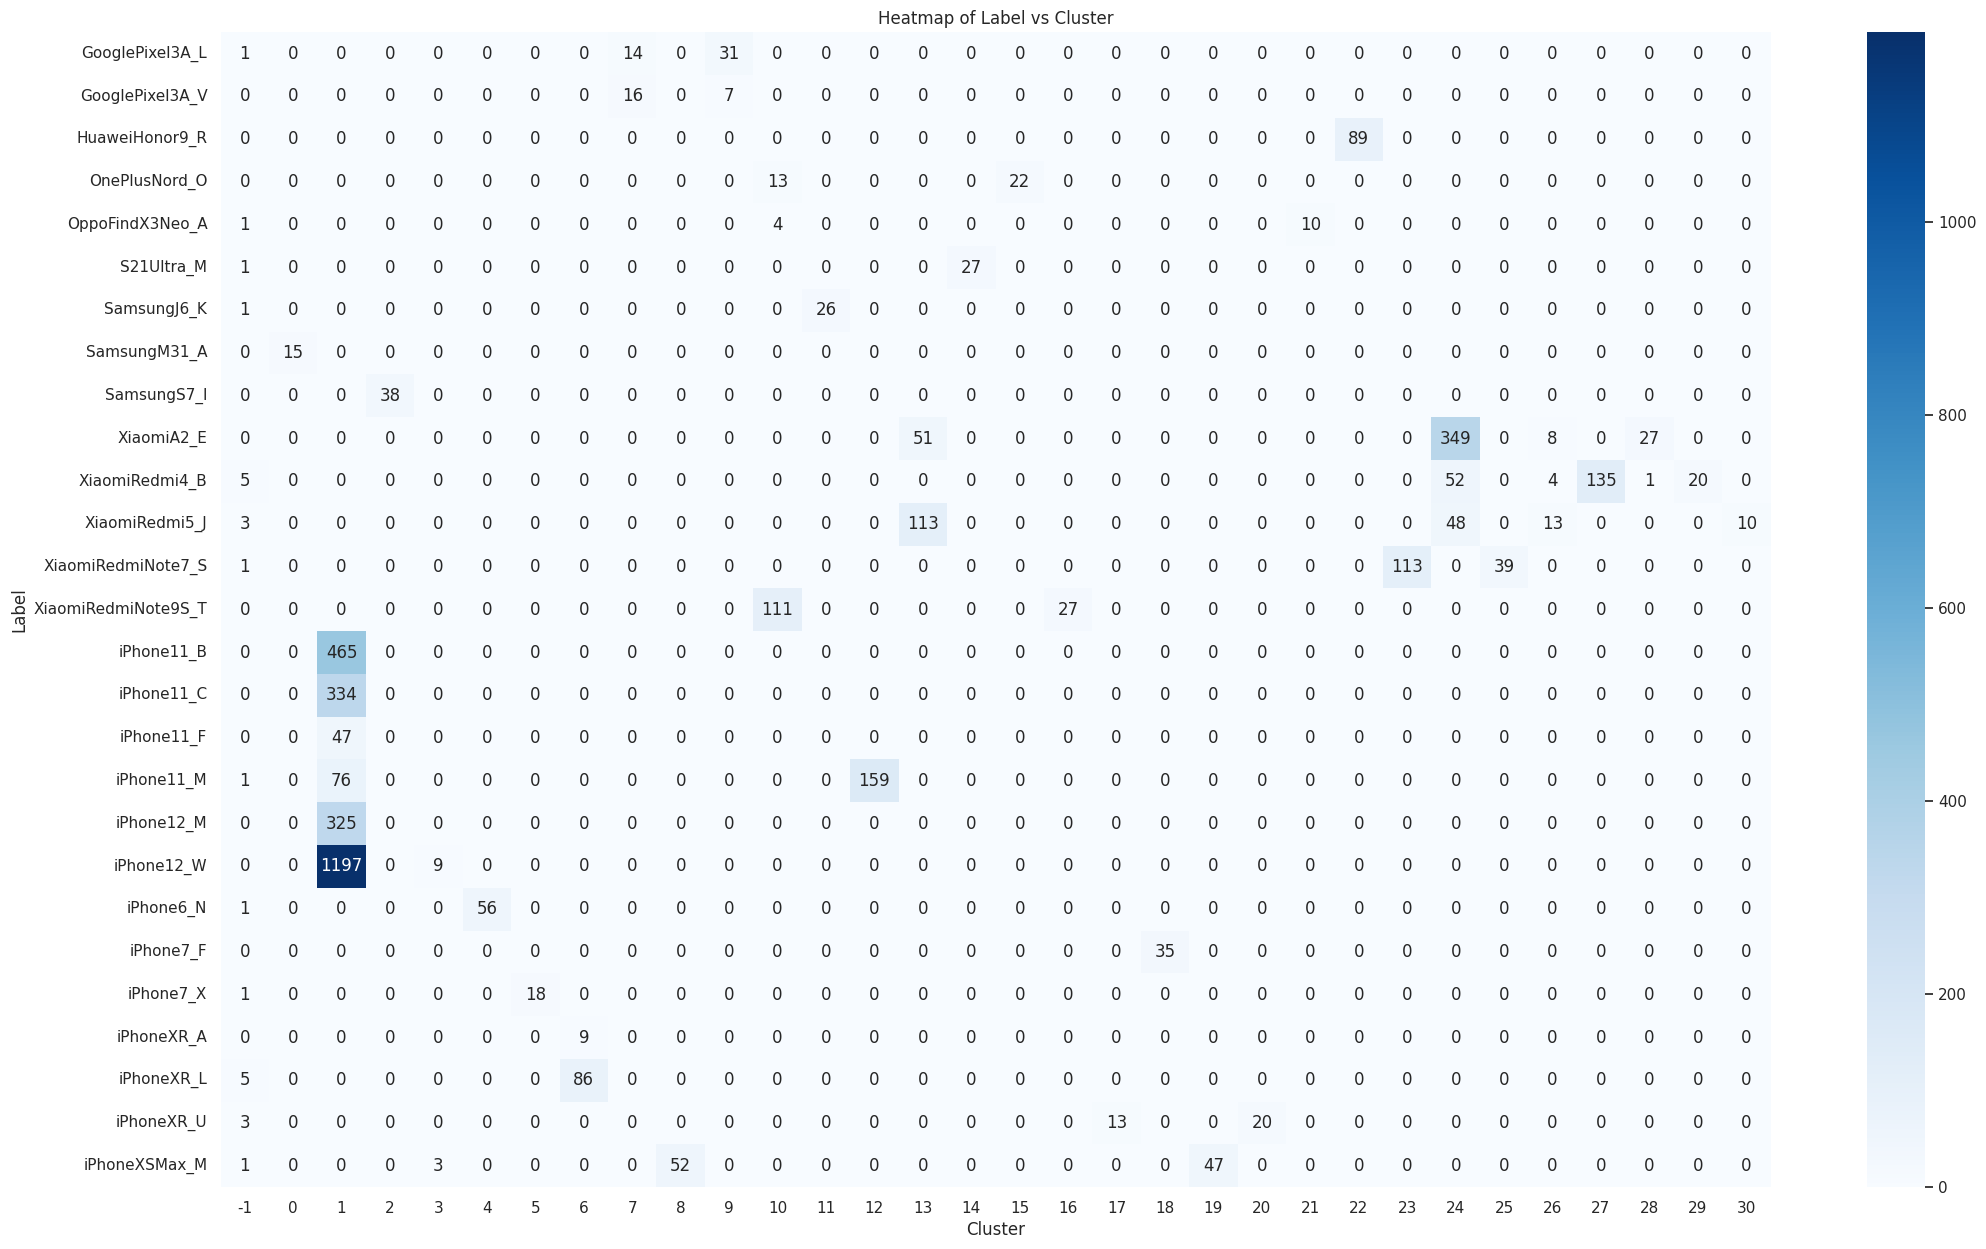

In [37]:
plotHelper.plot_heatmap(burst_df, "Label", "Cluster")

## Clustering Metrics

In [38]:
from sklearn.metrics import homogeneity_completeness_v_measure

In [39]:
# Compute homogeneity, completeness, and V-measure
h, c, v = homogeneity_completeness_v_measure(burst_df["Label"], burst_df["Cluster"])

In [40]:
print("Homogeneity: \t", h)
print("Completeness: \t", c)
print("V-measure: \t", v)

Homogeneity: 	 0.6478332266667084
Completeness: 	 0.8482475878297645
V-measure: 	 0.7346166951829513
